In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from taskdataset import TaskDataset
import torchvision
import cv2

path_to_data = "datasets/ModelStealingPub.pt" # TODO Set path to datasets files
path_to_models = "models/"

# import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
# import torch.onnx
import onnx
import onnxscript
from torchsummary import summary

In [2]:
dataset = torch.load(path_to_data)
dataset2 = []

# lenght = len(dataset)
length = 100

for i in range(length):
    image = np.array(dataset.imgs[i])


    if image.shape != (32, 32, 3):
        #convert to RGB
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    #convert to tensor
    image = torch.from_numpy(image)

    image = image.to(torch.float32) / 255
    label = np.random.rand(512)
    el = [image.reshape(3*32*32), label.astype(np.float32)]
    dataset2.append(el)
    # print(image.shape)
    # print(image.reshape(3*32*32).shape)



In [3]:
loader = torch.utils.data.DataLoader(dataset = dataset2,
                                     batch_size = 32,
                                     shuffle = True)

In [4]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            
            torch.nn.Linear(3 * 32 * 32, 1536),
            torch.nn.ReLU(),
            torch.nn.Linear(1536, 1536),
            torch.nn.ReLU(),
            torch.nn.Linear(1536, 512),
            
        )
         
 
    def forward(self, x):
        encoded = self.encoder(x)
        encoded.double()
        return encoded

In [5]:
# Model Initialization
model = AE()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)

In [6]:
epochs = 10
outputs = []
losses = []
all_losses = []

for epoch in range(epochs):
    
    print(f"\nEpoch {epoch+1} of {epochs}")
    print("-------------------------------")

    idx = -1

    for (image, labels) in loader:
      idx = idx + 1
      print(f"Bach {idx} of {len(loader)}")

      # Output of Autoencoder
      features = model(image)

      # Calculating the loss function
      loss = loss_function(features, labels)
       
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
       
      # Storing the losses in a list for plotting
      losses.append(float(loss))
    outputs.append((epochs, image, features))
    all_losses.append(np.average(losses)) 

    # torch_input = dataset2[0][0]
    # onnx_program = torch.onnx.dynamo_export(model, torch_input)




Epoch 1 of 10
-------------------------------
Bach 0 of 4
Bach 1 of 4
Bach 2 of 4
Bach 3 of 4

Epoch 2 of 10
-------------------------------
Bach 0 of 4
Bach 1 of 4
Bach 2 of 4
Bach 3 of 4

Epoch 3 of 10
-------------------------------
Bach 0 of 4
Bach 1 of 4
Bach 2 of 4
Bach 3 of 4

Epoch 4 of 10
-------------------------------
Bach 0 of 4
Bach 1 of 4
Bach 2 of 4
Bach 3 of 4

Epoch 5 of 10
-------------------------------
Bach 0 of 4
Bach 1 of 4
Bach 2 of 4
Bach 3 of 4

Epoch 6 of 10
-------------------------------
Bach 0 of 4
Bach 1 of 4
Bach 2 of 4
Bach 3 of 4

Epoch 7 of 10
-------------------------------
Bach 0 of 4
Bach 1 of 4
Bach 2 of 4
Bach 3 of 4

Epoch 8 of 10
-------------------------------
Bach 0 of 4
Bach 1 of 4
Bach 2 of 4
Bach 3 of 4

Epoch 9 of 10
-------------------------------
Bach 0 of 4
Bach 1 of 4
Bach 2 of 4
Bach 3 of 4

Epoch 10 of 10
-------------------------------
Bach 0 of 4
Bach 1 of 4
Bach 2 of 4
Bach 3 of 4


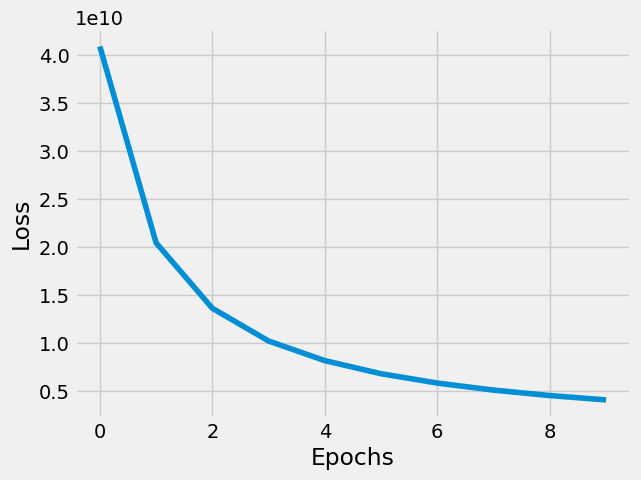

In [7]:

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# losses2 = np.array(losses2)
 
# Plotting the last 100 values
plt.plot(all_losses)
# losses